# Step 1: Data Collection

Here we will download 2000 sentences for 08 different Indian languages. 
We use the **IndicCorpV2** dataset from AI4Bharat.

In [1]:
import pandas as pd
from datasets import load_dataset
import os
import requests

# List of languages we want to study
# Format: (Language Name, URL Code, ISO Code for reference)
languages = [
    ("Hindi", "hi", "hin_Deva"),
    ("Bengali", "bn", "ben_Beng"),
    ("Tamil", "ta", "tam_Taml"),
    ("Telugu", "te", "tel_Telu"),
    ("Kannada", "kn", "kan_Knda"),
    ("Malayalam", "ml", "mal_Mlym"),
    ("Marathi", "mr", "mar_Deva"),
    ("Gujarati", "gu", "guj_Gujr"),
]

all_sentences = []
target_count = 2000 # How many sentences we want per language

print("Starting download...")

for lang_name, url_code, iso_code in languages:
    print(f"Processing {lang_name}...")
    
    # URL where the text file is stored
    # Some files have a '-1' suffix so we check that too
    base_url = "https://huggingface.co/datasets/ai4bharat/IndicCorpV2/resolve/main/data/"
    file_url = f"{base_url}{url_code}.txt"
    
    # Check if the URL exists, if not try the one with '-1'
    response = requests.head(file_url, allow_redirects=True)
    if response.status_code != 200:
        file_url = f"{base_url}{url_code}-1.txt"
    
    # Load the data using 'streaming=True' so we don't download the whole huge file
    dataset = load_dataset("text", data_files={"train": file_url}, split="train", streaming=True)
    
    # Get the first 2000 sentences
    count = 0
    for item in dataset:
        text = item['text'].strip()
        if len(text) > 0: # Only take non-empty sentences
            all_sentences.append({
                "language": lang_name,
                "iso_code": iso_code,
                "text": text
            })
            count += 1
            
        if count >= target_count:
            break
    
    print(f"  -> Loaded {count} sentences for {lang_name}")

# Save everything to a CSV file
output_file = "../data/indic_corp_v2_2000.csv"
df = pd.DataFrame(all_sentences)
df.to_csv(output_file, index=False)

print(f"\nSuccess! Saved all data to {output_file}")
print(df['language'].value_counts())

Starting download...
Processing Hindi...
  -> Loaded 2000 sentences for Hindi
Processing Bengali...
  -> Loaded 2000 sentences for Bengali
Processing Tamil...
  -> Loaded 2000 sentences for Tamil
Processing Telugu...
  -> Loaded 2000 sentences for Telugu
Processing Kannada...
  -> Loaded 2000 sentences for Kannada
Processing Malayalam...
  -> Loaded 2000 sentences for Malayalam
Processing Marathi...
  -> Loaded 2000 sentences for Marathi
Processing Gujarati...
  -> Loaded 2000 sentences for Gujarati

Success! Saved all data to ../data/indic_corp_v2_2000.csv
language
Hindi        2000
Bengali      2000
Tamil        2000
Telugu       2000
Kannada      2000
Malayalam    2000
Marathi      2000
Gujarati     2000
Name: count, dtype: int64


## 1.2 Basic Inspection

In [2]:
# View the first few rows
df.head()

,language,iso_code,text
0,Hindi,hin_Deva,लोगों को बिलों संबंधी सुविधा देना ही उनका काम
1,Hindi,hin_Deva,इनेलो 1987 में उस वक्त ऐसे ही दोराहे पर खड़ी थ...
2,Hindi,hin_Deva,जहां आई थी तबाही उस घाटी क्षेत्र में खतरा ज्यादा
3,Hindi,hin_Deva,इसके बाद केंद्र की ओर से प्रदेश सरकार को पीएमज...
4,Hindi,hin_Deva,यह पूछने पर कि इस बड़े मैच से पहले उनकी नींद ग...


In [3]:
# Check dataset info (columns, data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   language  16000 non-null  object
 1   iso_code  16000 non-null  object
 2   text      16000 non-null  object
dtypes: object(3)
memory usage: 375.1+ KB


## 1.3 Data Distribution
Let's see how many sentences we have for each language.

In [4]:
language_counts = df['language'].value_counts()
print(language_counts)

language
Hindi        2000
Bengali      2000
Tamil        2000
Telugu       2000
Kannada      2000
Malayalam    2000
Marathi      2000
Gujarati     2000
Name: count, dtype: int64


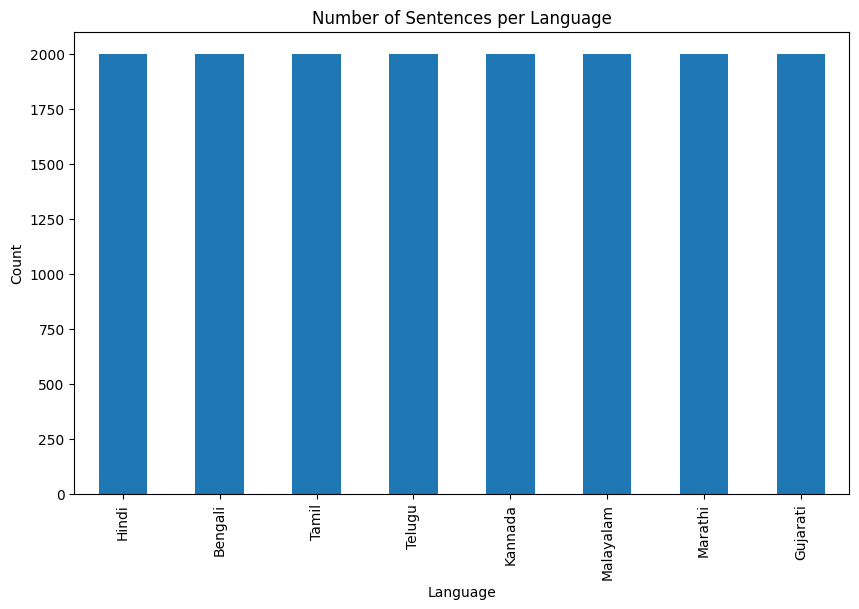

In [5]:
# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Number of Sentences per Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()